In [913]:
from sympy import simplify, lambdify, latex, Symbol, binomial, factorial, factor, exp
#from sympy.abc import k, N, M, m
from sympy.concrete.summations import summation
from sympy.concrete.products import product
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

p = Symbol('p', positive=True)
i = Symbol('i', integer=True)
k = Symbol('k', integer=True, positive=True)
N = Symbol('N', integer=True, positive=True)
m = Symbol('m', integer=True, positive=True)

In [914]:
pmf = m * binomial(N - m, k - m) / (binomial(N, k - 1) * (N - k + 1))

pmf

m*binomial(N - m, k - m)/((N - k + 1)*binomial(N, k - 1))

In [915]:
simplify(pmf)

m*factorial(N - m)*factorial(k - 1)/(factorial(N)*factorial(k - m))

In [916]:
# This is my simplification on paper which sympy was unable to do
pmf_alt = m / N * product((k - i) / (N - i), (i, 1, m - 1))
pmf_alt

m*RisingFactorial(1 - k, m - 1)/(N*RisingFactorial(1 - N, m - 1))

In [917]:
# Distribution parameters
_n = 25
_ks = np.arange(_n + 1)
_ns = np.array([5, 10, 15, 25])

In [918]:
# Convert PMF to Python function
pmf_l = lambdify((k, N, m), pmf)
pmf_lv = np.vectorize(pmf_l, excluded=['m', 'N'])

pmf_l(41, 42, 40)

0.04645760743321717

In [919]:
pmf_alt_l = lambdify((k, N, m), pmf_alt)
pmf_alt_lv = np.vectorize(pmf_alt_l, excluded=['m', 'N'])

pmf_alt_l(41, 42, 40)

0.04645760743321719

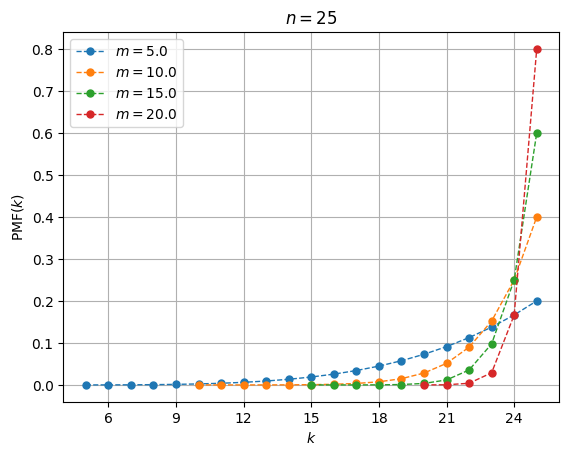

In [920]:
# Plot the PMF
fig, ax = plt.subplots()
for _m in (5.0, 10.0, 15.0, 20.0):
    _ks = np.arange(_m, _n + 1)
    ax.plot(_ks, pmf_alt_lv(_ks, _n, _m), label=f"$m={_m}$", marker='o', linewidth=1, markersize=5, linestyle='dashed')
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("$k$")
ax.set_ylabel("PMF($k$)")
ax.set_title(f"$n={_n}$")
ax.grid()

In [921]:
ev = summation(k * pmf_alt, (k, 0, N))

simplify(ev)

m*(N + 1)/(m + 1)

In [922]:
evp = ev.subs(m, p * N)
evp

N*p*(N + 1)/(N*p + 1)

In [923]:
evp_l = lambdify((p, N), evp)
evp_lv = np.vectorize(evp_l, excluded=['N'])

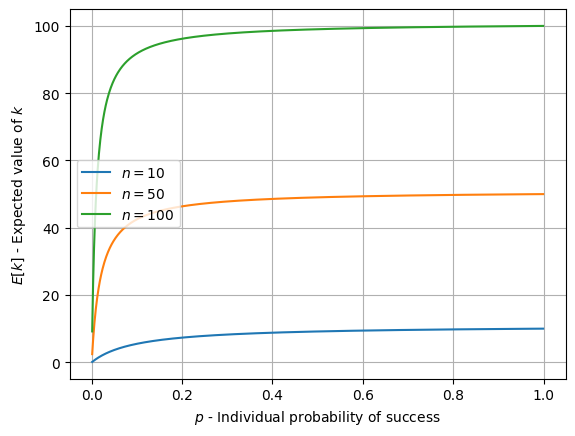

In [924]:
_ps = np.linspace(0.001,0.999,1000)
fig, ax = plt.subplots()
for _nsi in (10, 50, 100): #_ns:
    ax.plot(_ps, evp_lv(_ps, _nsi), label=f"$n={_nsi}$")
    #ax.plot(_ps, evp_lv(_ps, _nsi), label=f"$n={_nsi}$ (NHG)", linestyle='dashed', color=plt.gca().lines[-1].get_color())
ax.legend()
ax.set_xlabel("$p$ - Individual probability of success")
ax.set_ylabel("$E[k]$ - Expected value of $k$")
ax.grid()

In [925]:
pmf_bin = summation(pmf_alt * binomial(N, m) * p ** m * (1 - p) ** (N - m), (m, 1, k))

pmf_bin

Piecewise(((-1)**(N - 1)*N*p*(p - 1)**(N - 1)*(-p/(p - 1) + 1)**(k - 1), ((k <= 1) & (p*Abs(1/(p - 1)) <= 1)) | ((k > 1) & (p*Abs(1/(p - 1)) <= 1))), (Sum(m*p**m*(1 - p)**(N - m)*RisingFactorial(1 - k, m - 1)*binomial(N, m)/RisingFactorial(1 - N, m - 1), (m, 1, k)), True))/N

In [926]:
simplify(pmf_bin)

Piecewise(((-1)**(N + k)*p*(p - 1)**(N - k), p/Abs(p - 1) <= 1), (Sum(p**m*(1 - p)**(N - m)*binomial(k - 1, k - m), (m, 1, k)), True))

In [927]:
# Convert PMF to Python function
pmf_bin_l = lambdify((k, N, p), simplify(pmf_bin))
pmf_bin_lv = np.vectorize(pmf_bin_l, excluded=['p', 'N'])

pmf_bin_l(9, 20, 0.25)

array(0.01055878)

In [928]:
# This is currently wrong
pmf_bin_alt = (1+p*(1-k)/(1-N))**(N-1)

simplify(pmf_bin_alt)

pmf_bin_alt

(p*(1 - k)/(1 - N) + 1)**(N - 1)

In [929]:
pmf_bin_alt_l = lambdify((k, N, p), pmf_bin_alt)
pmf_bin_alt_lv = np.vectorize(pmf_bin_l, excluded=['p', 'N'])

pmf_bin_alt_l(9, 20, 0.25)

6.696504759456206

/home/nuno/workspace/latas/env/lib/python3.10/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in func (vectorized)
  outputs = ufunc(*inputs)


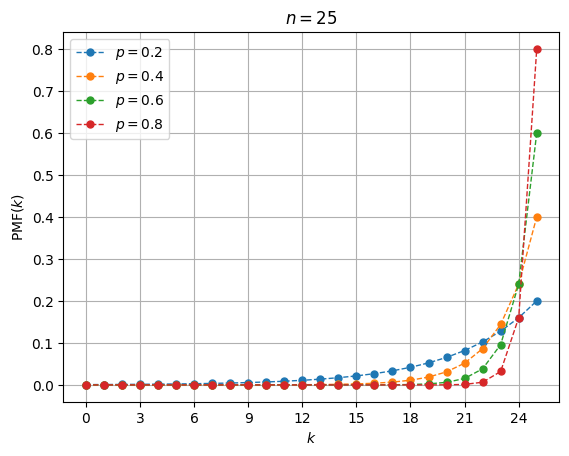

In [930]:
# Plot the PMF
_ks = np.arange(_n + 1)
_pis = np.array([0.2, 0.4, 0.6, 0.8])

fig, ax = plt.subplots()
for _pi in _pis:
    ax.plot(_ks, pmf_bin_lv(_ks, _n, _pi), label=f"$p={_pi}$", marker='o', linewidth=1, markersize=5, linestyle='dashed')
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("$k$")
ax.set_ylabel("PMF($k$)")
ax.set_title(f"$n={_n}$")
ax.grid()